<a href="https://colab.research.google.com/github/oxayavongsa/projects/blob/Cannabis-Supply-and-Demand-California-02.2025/Cannabis_Supply_and_Demand_California_02_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cannabis Market Data by County - Supply and Demand - effective 02.18.25

In [ ]:
# Install and import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
all_counties = [county for counties in areas.values() for county in counties]
print("All Counties:", all_counties)

All Counties: ['Sacramento', 'Yolo', 'Solano', 'San Joaquin', 'Marin', 'Alameda', 'San Mateo', 'San Francisco', 'Napa', 'Contra Costa', 'Sonoma', 'Los Angeles', 'San Diego', 'Orange']


In [ ]:
# Define the dictionary mapping original column names to the new names
rename_columns = {
    'licenseNumber': 'license',
    'licenseType': 'type',
    'licenseStatus': 'status',
    'premiseCounty': 'county',
    'expirationDate': 'exp',
    'businessLegalName': 'business name',
    'businessOwnerName': 'owner name',
    'businessEmail': 'email',
    'businessPhone': 'phone'
}

# Apply the renaming to all relevant DataFrames
cultivation_df.rename(columns=rename_columns, inplace=True)
manuf_df.rename(columns=rename_columns, inplace=True)
non_storefront_df.rename(columns=rename_columns, inplace=True)
retailer_df.rename(columns=rename_columns, inplace=True)

# Print the updated column names for one DataFrame as confirmation
print("Updated cultivation_df columns:")
print(cultivation_df.columns)

Updated cultivation_df columns:
Index(['license', 'Type', 'Status', 'county', 'exp', 'business name',
       'owner name', 'email', 'phone'],
      dtype='object')


In [ ]:
# Read the CSV files
cultivation_df = pd.read_csv('cultivation.csv')
manuf_df = pd.read_csv('manuf.csv')
non_storefront_df = pd.read_csv('non storefront.csv')
retailer_df = pd.read_csv('retailer.csv')

# Define the dictionary mapping original column names to the new names
rename_columns = {
    'licenseNumber': 'license',
    'licenseType': 'type',
    'licenseStatus': 'status',
    'premiseCounty': 'county',
    'expirationDate': 'exp',
    'businessLegalName': 'business name',
    'businessOwnerName': 'owner name',
    'businessEmail': 'email',
    'businessPhone': 'phone'
}

# Apply the renaming to all relevant DataFrames
for df in [cultivation_df, manuf_df, non_storefront_df, retailer_df]:
    df.rename(columns=rename_columns, inplace=True)

# Define a function to perform EDA and cleaning on a DataFrame
def eda_and_clean(df, df_name):
    print(f"--- {df_name} EDA ---")

    # Display the first few rows to preview the data
    print("First 5 rows:")
    print(df.head(), "\n")

    # Print DataFrame information to inspect column types and non-null counts
    print("DataFrame Info:")
    df.info()
    print()

    # Display summary statistics (including non-numeric columns)
    print("Summary Statistics:")
    print(df.describe(include='all'), "\n")

    # Check and print missing values per column
    print("Missing Values per Column:")
    print(df.isnull().sum(), "\n")

    # Remove duplicate rows if any and report the change
    initial_count = df.shape[0]
    df.drop_duplicates(inplace=True)
    final_count = df.shape[0]
    print(f"Removed {initial_count - final_count} duplicate rows.\n")

    # Optional: Convert 'exp' column to datetime (if needed) and fill/drop missing values
    if 'exp' in df.columns:
        df['exp'] = pd.to_datetime(df['exp'], errors='coerce')
        # Example: Fill missing expiration dates with a placeholder date if appropriate
        # df['exp'].fillna(pd.Timestamp('2099-12-31'), inplace=True)

    print(f"--- End of {df_name} EDA ---\n")
    return df

# Apply EDA and cleaning to each DataFrame
cultivation_df = eda_and_clean(cultivation_df, "Cultivation")
manuf_df = eda_and_clean(manuf_df, "Manufacturing")
non_storefront_df = eda_and_clean(non_storefront_df, "Non-Storefront")
retailer_df = eda_and_clean(retailer_df, "Retailer")

--- Cultivation EDA ---
First 5 rows:
         license                             type  status   county        exp  \
0  CCL18-0000104  Cultivation -  Specialty Indoor  Active  Alameda  4/17/2025   
1  CCL18-0000170      Cultivation -  Small Indoor  Active  Alameda  1/24/2026   
2  CCL18-0000214  Cultivation -  Specialty Indoor  Active  Alameda  12/9/2025   
3  CCL18-0000702           Cultivation -  Nursery  Active  Alameda   6/1/2025   
4  CCL18-0000807      Cultivation -  Small Indoor  Active  Alameda   5/1/2025   

                 business name                     owner name  \
0          CWG Botanicals Inc.  Michael Esmeyer, Rebecca Kirk   
1  Amelia Street Ventures, LLC   Colin Zilberberg, jason post   
2                    JT Supply                        Kyle Wu   
3          PCG Industries Inc.               Auryn McCafferty   
4                  FIGKH, Inc.     Chloe Madison, Keith Healy   

                           email           phone  
0     Rebecca@ccgiconsulting.Com 

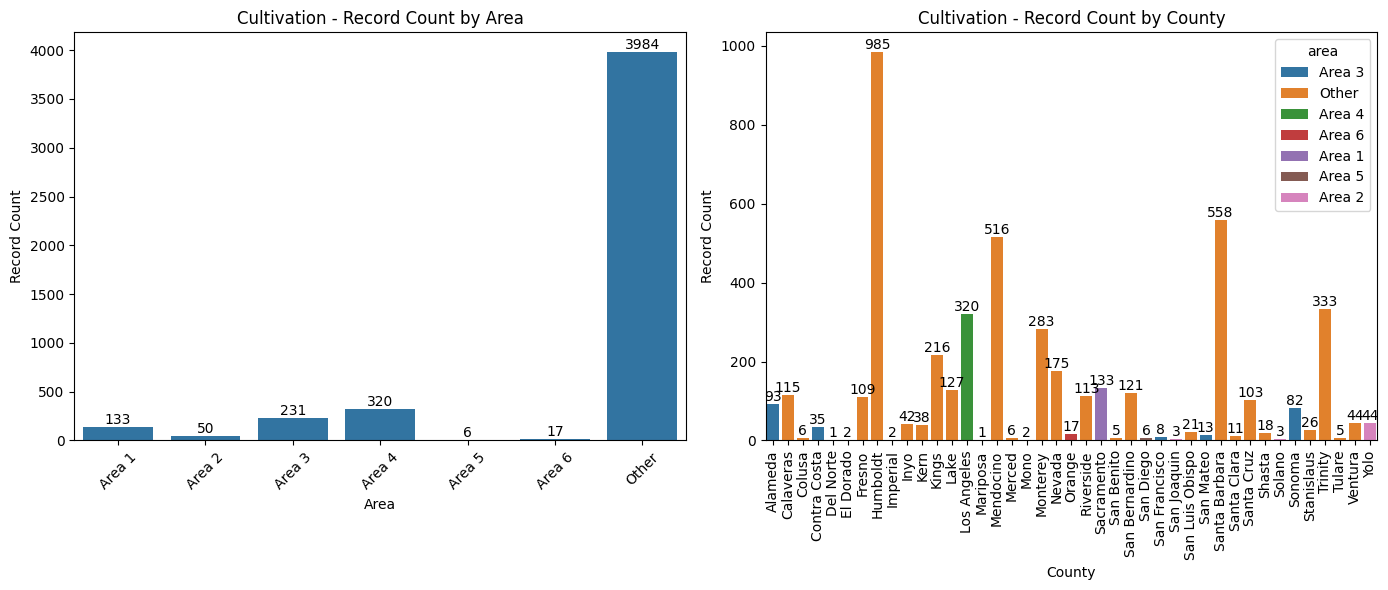

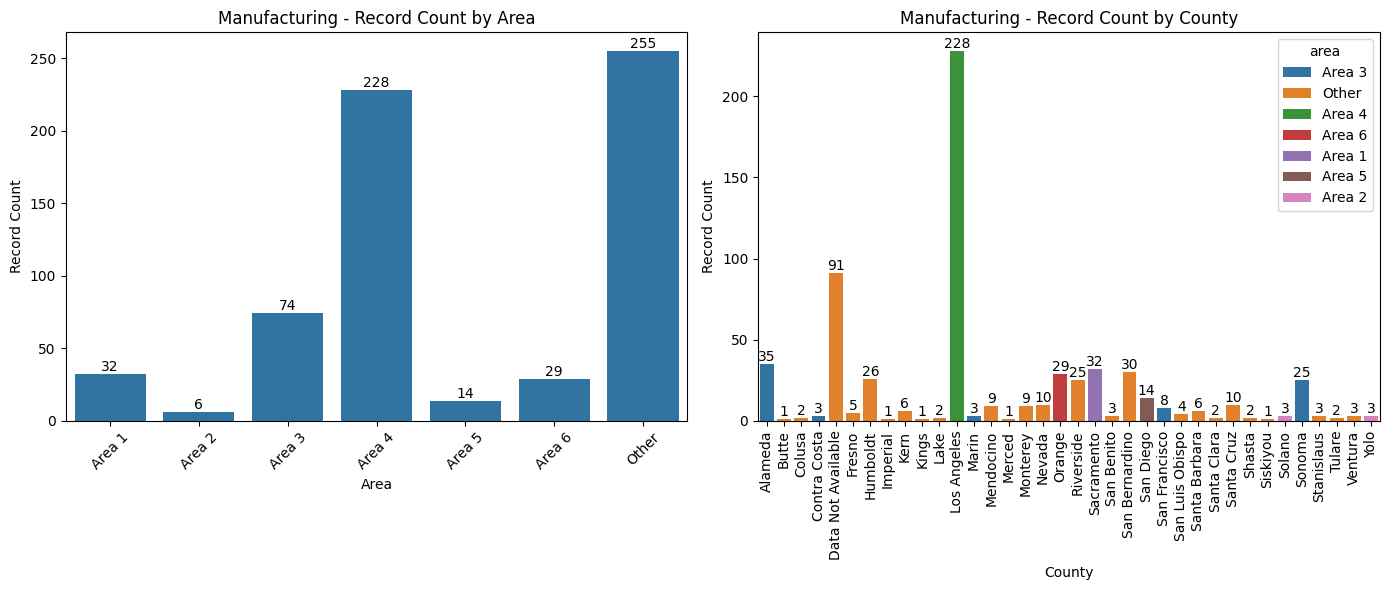

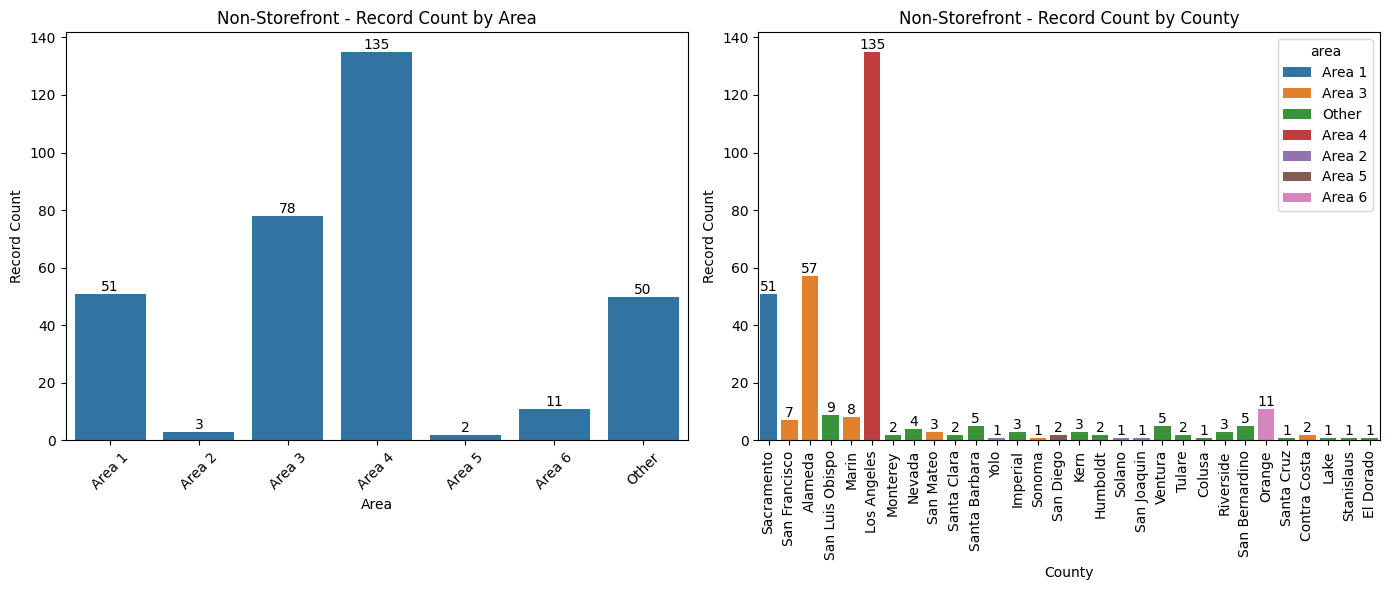

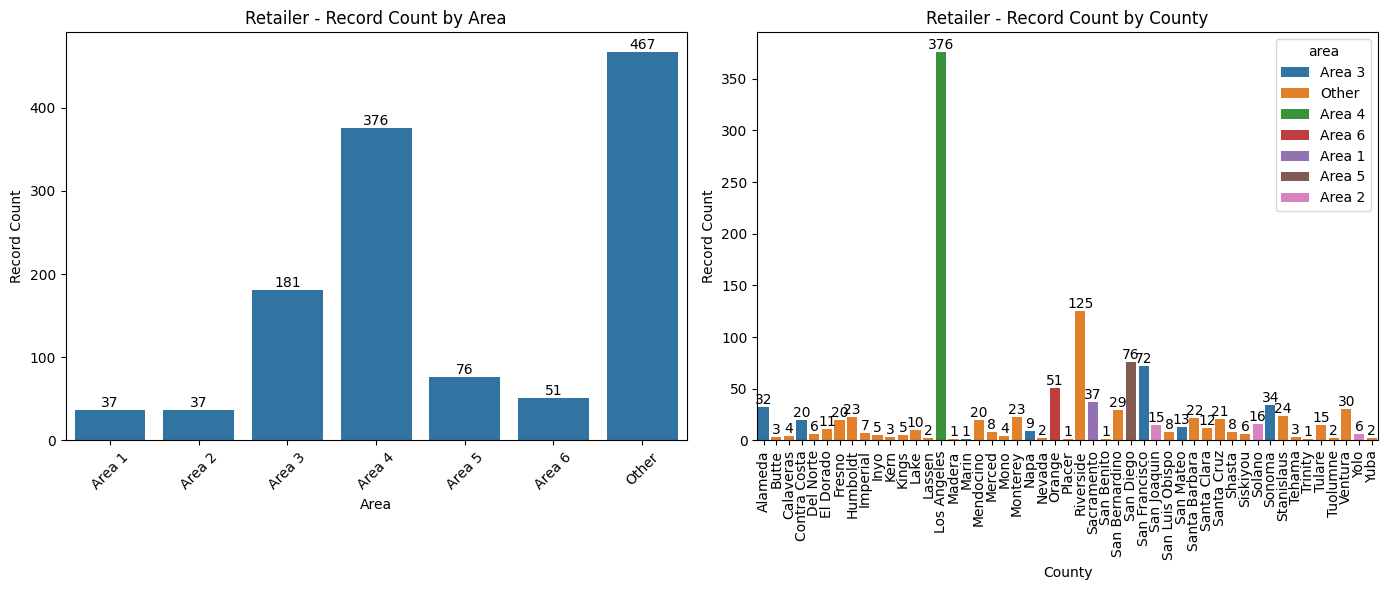

In [ ]:
# Dictionary mapping area numbers to county lists
areas = {
    1: ['Sacramento'],
    2: ['Yolo', 'Solano', 'San Joaquin'],
    3: ['Marin', 'Alameda', 'San Mateo', 'San Francisco', 'Napa', 'Contra Costa', 'Sonoma'],
    4: ['Los Angeles'],
    5: ['San Diego'],
    6: ['Orange']
}

# Function to assign area based on county
def assign_area(county):
    for area, counties in areas.items():
        if county in counties:
            return f"Area {area}"
    return "Other"

# Apply 'area' column creation to each DataFrame
for df in [cultivation_df, manuf_df, non_storefront_df, retailer_df]:
    df['area'] = df['county'].apply(assign_area)

def plot_area_counts(df, dataset_name):
    plt.figure(figsize=(14, 6))

    # Visual 1: Count of records by Area
    plt.subplot(1, 2, 1)
    area_plot = sns.countplot(data=df, x='area', order=sorted(df['area'].unique()))
    plt.title(f"{dataset_name} - Record Count by Area")
    plt.xlabel("Area")
    plt.ylabel("Record Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels 45 degrees for areas

    # Add bar labels showing counts
    for container in area_plot.containers:
        area_plot.bar_label(container)

    # Visual 2: Count of records by County with area as hue
    plt.subplot(1, 2, 2)
    county_plot = sns.countplot(data=df, x='county', hue='area')
    plt.title(f"{dataset_name} - Record Count by County")
    plt.xlabel("County")
    plt.ylabel("Record Count")
    plt.xticks(rotation=90)  # Rotate x-axis labels 90 degrees for counties

    # Add bar labels showing counts
    for container in county_plot.containers:
        county_plot.bar_label(container)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_area_counts(cultivation_df, "Cultivation")
plot_area_counts(manuf_df, "Manufacturing")
plot_area_counts(non_storefront_df, "Non-Storefront")
plot_area_counts(retailer_df, "Retailer")

In [ ]:
# Create a master list of all target counties
all_counties = [
    "Sacramento",
    "Yolo",
    "Solano",
    "San Joaquin",
    "Marin",
    "Alameda",
    "San Mateo",
    "San Francisco",
    "Napa",
    "Contra Costa",
    "Sonoma",
    "Los Angeles",
    "San Diego",
    "Orange"
]

# Drop rows for any county not in the target list
for df in [cultivation_df, manuf_df, non_storefront_df, retailer_df]:
    df.drop(df[~df['county'].isin(all_counties)].index, inplace=True)

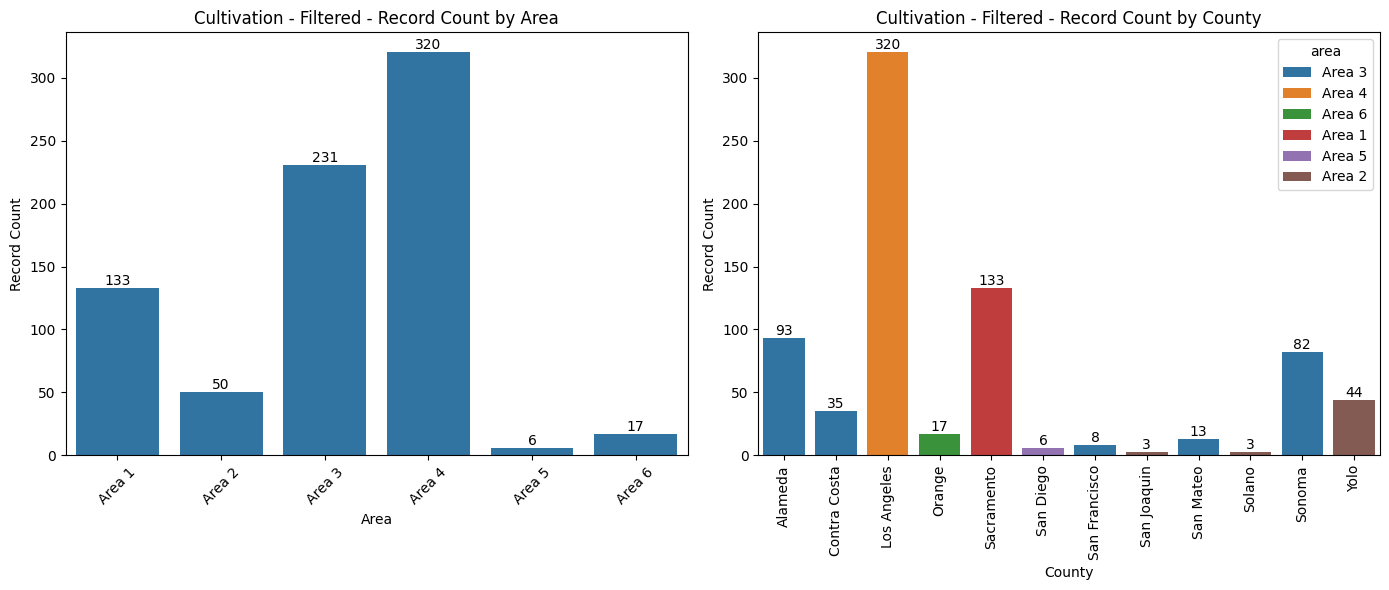

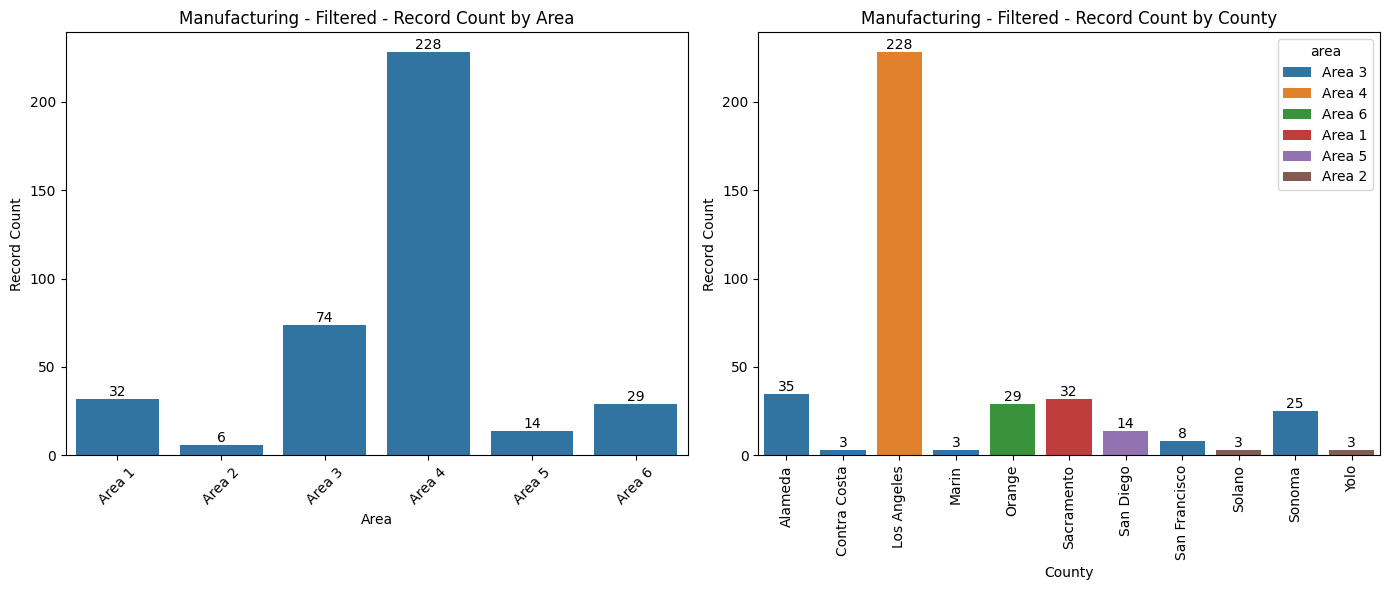

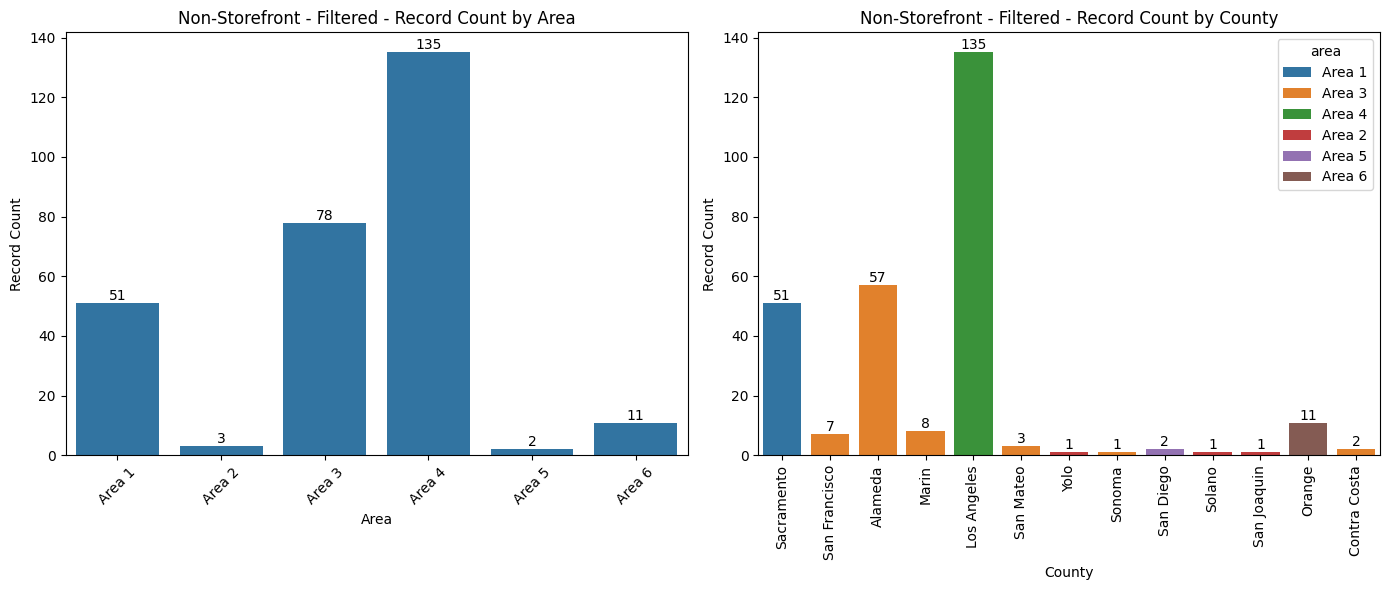

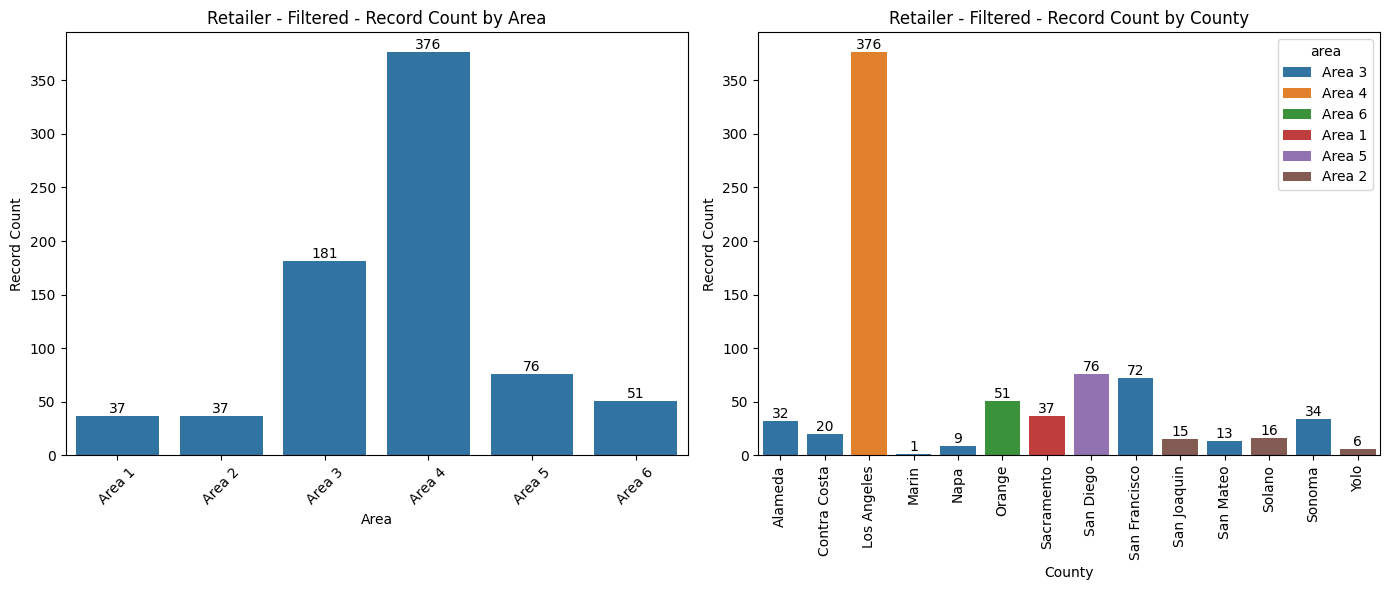

In [ ]:
# Define the function to plot visuals with proper label rotations
def plot_area_counts(df, dataset_name):
    plt.figure(figsize=(14, 6))

    # Visual 1: Count of records by Area with 45° rotation for x-axis labels
    plt.subplot(1, 2, 1)
    area_plot = sns.countplot(data=df, x='area', order=sorted(df['area'].unique()))
    plt.title(f"{dataset_name} - Record Count by Area")
    plt.xlabel("Area")
    plt.ylabel("Record Count")
    plt.xticks(rotation=45)
    # Add bar labels for clarity
    for container in area_plot.containers:
        area_plot.bar_label(container)

    # Visual 2: Count of records by County with area as hue, county labels rotated 90°
    plt.subplot(1, 2, 2)
    county_plot = sns.countplot(data=df, x='county', hue='area')
    plt.title(f"{dataset_name} - Record Count by County")
    plt.xlabel("County")
    plt.ylabel("Record Count")
    plt.xticks(rotation=90)
    # Add bar labels for clarity
    for container in county_plot.containers:
        county_plot.bar_label(container)

    plt.tight_layout()
    plt.show()

# Generate visuals for each filtered DataFrame after cleaning
plot_area_counts(cultivation_df, "Cultivation - Filtered")
plot_area_counts(manuf_df, "Manufacturing - Filtered")
plot_area_counts(non_storefront_df, "Non-Storefront - Filtered")
plot_area_counts(retailer_df, "Retailer - Filtered")

Area 1: Sacramento

Area 2: Yolo, Solano, San Joaquin

Area 3: Marin, Alameda, San Mateo, San Francisco, Napa, Contra Costa, Sonoma

Area 4: Los Angeles

Area 5: San Diego

Area 6: Orange

Merged Summary by County:
           county  cultivation_count  manuf_count  non_storefront_count  \
0         Alameda               93.0         35.0                  57.0   
1    Contra Costa               35.0          3.0                   2.0   
2     Los Angeles              320.0        228.0                 135.0   
3           Marin                0.0          3.0                   8.0   
4            Napa                0.0          0.0                   0.0   
5          Orange               17.0         29.0                  11.0   
6      Sacramento              133.0         32.0                  51.0   
7       San Diego                6.0         14.0                   2.0   
8   San Francisco                8.0          8.0                   7.0   
9     San Joaquin                3.0          0.0                   1.0   
10      San Mateo               13.0          0.0                   3.0   
11         Solano                3.0          3.0                   1.0   

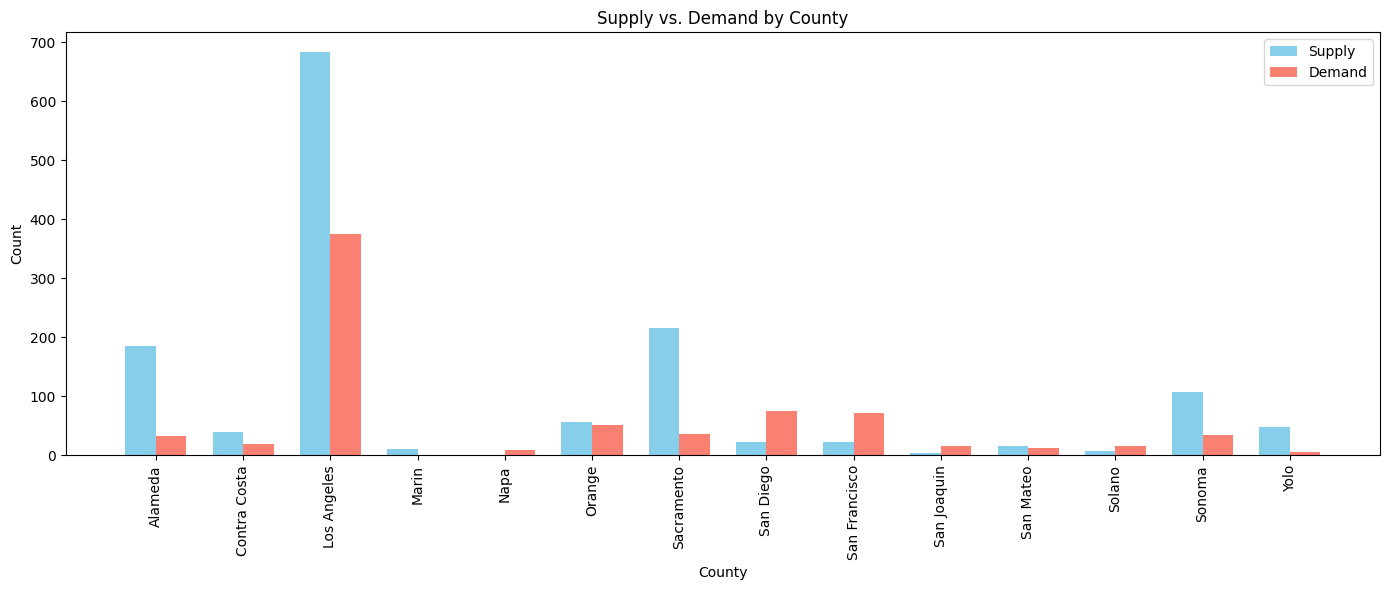

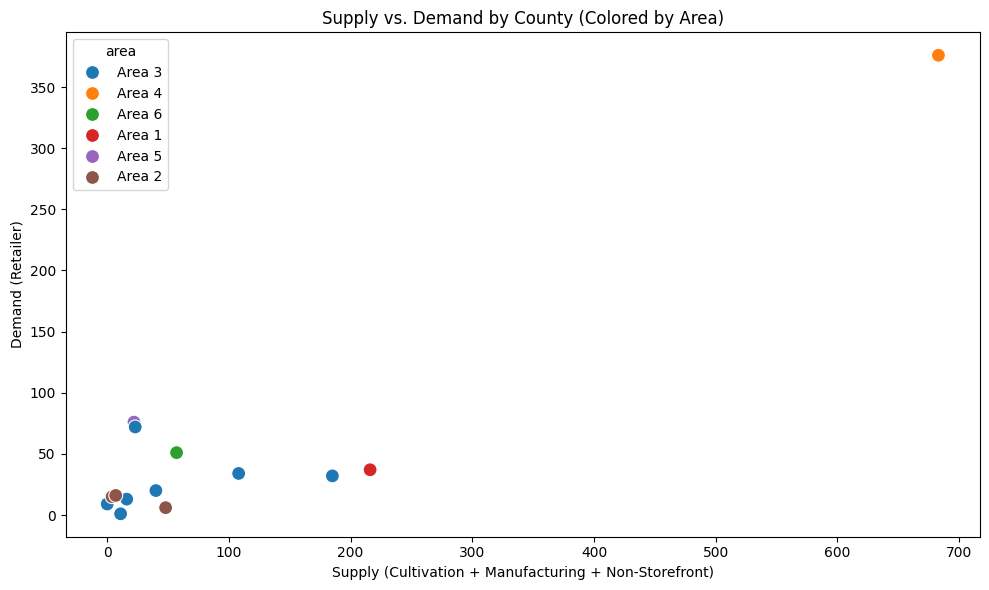

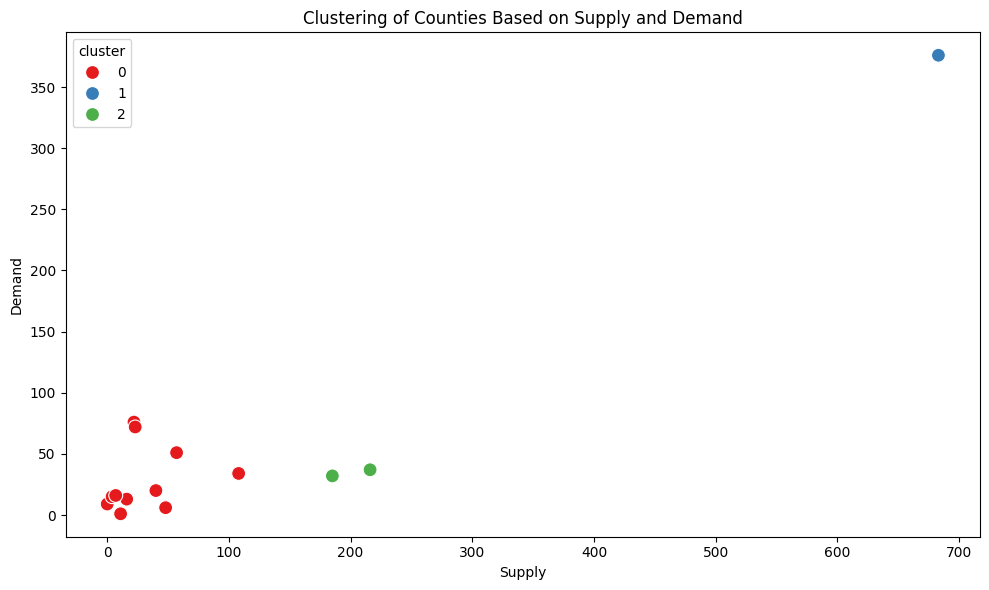

Cluster Summary (Mean Values):
             supply      demand  supply_demand_ratio
cluster                                             
0         30.545455   28.454545             2.530725
1        683.000000  376.000000             1.816489
2        200.500000   34.500000             5.809544


In [ ]:
# ===========================================================
# Step 1: Aggregate Data by County from Each DataFrame
# ===========================================================

# Count the number of records per county in each dataset
cultivation_summary = cultivation_df.groupby('county').size().reset_index(name='cultivation_count')
manuf_summary = manuf_df.groupby('county').size().reset_index(name='manuf_count')
non_storefront_summary = non_storefront_df.groupby('county').size().reset_index(name='non_storefront_count')
retailer_summary = retailer_df.groupby('county').size().reset_index(name='retailer_count')

# Merge summaries on county using outer join to capture all records
summary = cultivation_summary.merge(manuf_summary, on='county', how='outer')
summary = summary.merge(non_storefront_summary, on='county', how='outer')
summary = summary.merge(retailer_summary, on='county', how='outer')

# Replace any missing counts with 0 (i.e., if a county is absent in one dataset)
summary.fillna(0, inplace=True)

# ===========================================================
# Step 2: Add Area Information and Compute Supply & Demand
# ===========================================================

# Function to assign area based on county using your areas dictionary
def get_area(county):
    for area, counties in areas.items():
        if county in counties:
            return f"Area {area}"
    return "Other"

summary['area'] = summary['county'].apply(get_area)

# Since we want only our target counties, drop any counties labeled as "Other"
summary = summary[summary['area'] != "Other"]

# Define 'supply' as the sum of cultivation, manufacturing, and non-storefront counts
summary['supply'] = summary['cultivation_count'] + summary['manuf_count'] + summary['non_storefront_count']
# Define 'demand' as the retailer count
summary['demand'] = summary['retailer_count']

# Optionally, compute a supply–demand ratio (if demand > 0; otherwise, keep it as supply)
summary['supply_demand_ratio'] = summary.apply(
    lambda row: row['supply'] / row['demand'] if row['demand'] > 0 else row['supply'], axis=1)

print("Merged Summary by County:")
print(summary)

# ===========================================================
# Step 3: Visualize the Aggregated Data
# ===========================================================

# 3a. Bar Plot: Supply vs Demand by County
plt.figure(figsize=(14,6))
summary_sorted = summary.sort_values('county')
index = range(len(summary_sorted))
bar_width = 0.35

plt.bar(index, summary_sorted['supply'], bar_width, label='Supply', color='skyblue')
plt.bar([i + bar_width for i in index], summary_sorted['demand'], bar_width, label='Demand', color='salmon')
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Supply vs. Demand by County')
plt.xticks([i + bar_width/2 for i in index], summary_sorted['county'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# 3b. Scatter Plot: Supply vs Demand Colored by Area
plt.figure(figsize=(10,6))
sns.scatterplot(data=summary, x='supply', y='demand', hue='area', s=100)
plt.title('Supply vs. Demand by County (Colored by Area)')
plt.xlabel('Supply (Cultivation + Manufacturing + Non-Storefront)')
plt.ylabel('Demand (Retailer)')
plt.tight_layout()
plt.show()

# ===========================================================
# Step 4: Clustering Analysis to Identify Groupings
# ===========================================================

# Using KMeans clustering on the supply and demand columns
X = summary[['supply', 'demand']].values
kmeans = KMeans(n_clusters=3, random_state=42)  # you can adjust the number of clusters as needed
clusters = kmeans.fit_predict(X)
summary['cluster'] = clusters

plt.figure(figsize=(10,6))
sns.scatterplot(data=summary, x='supply', y='demand', hue='cluster', palette='Set1', s=100)
plt.title('Clustering of Counties Based on Supply and Demand')
plt.xlabel('Supply')
plt.ylabel('Demand')
plt.tight_layout()
plt.show()

print("Cluster Summary (Mean Values):")
print(summary.groupby('cluster').agg({'supply': 'mean', 'demand': 'mean', 'supply_demand_ratio': 'mean'}))

Summary with Manufacturer and Distribution Metrics:
           county    area  manufacturer_supply  manufacturer_demand  \
0         Alameda  Area 3                 35.0                   32   
1    Contra Costa  Area 3                  3.0                   20   
2     Los Angeles  Area 4                228.0                  376   
3           Marin  Area 3                  3.0                    1   
4            Napa  Area 3                  0.0                    9   
5          Orange  Area 6                 29.0                   51   
6      Sacramento  Area 1                 32.0                   37   
7       San Diego  Area 5                 14.0                   76   
8   San Francisco  Area 3                  8.0                   72   
9     San Joaquin  Area 2                  0.0                   15   
10      San Mateo  Area 3                  0.0                   13   
11         Solano  Area 2                  3.0                   16   
12         Sonoma  Area 3

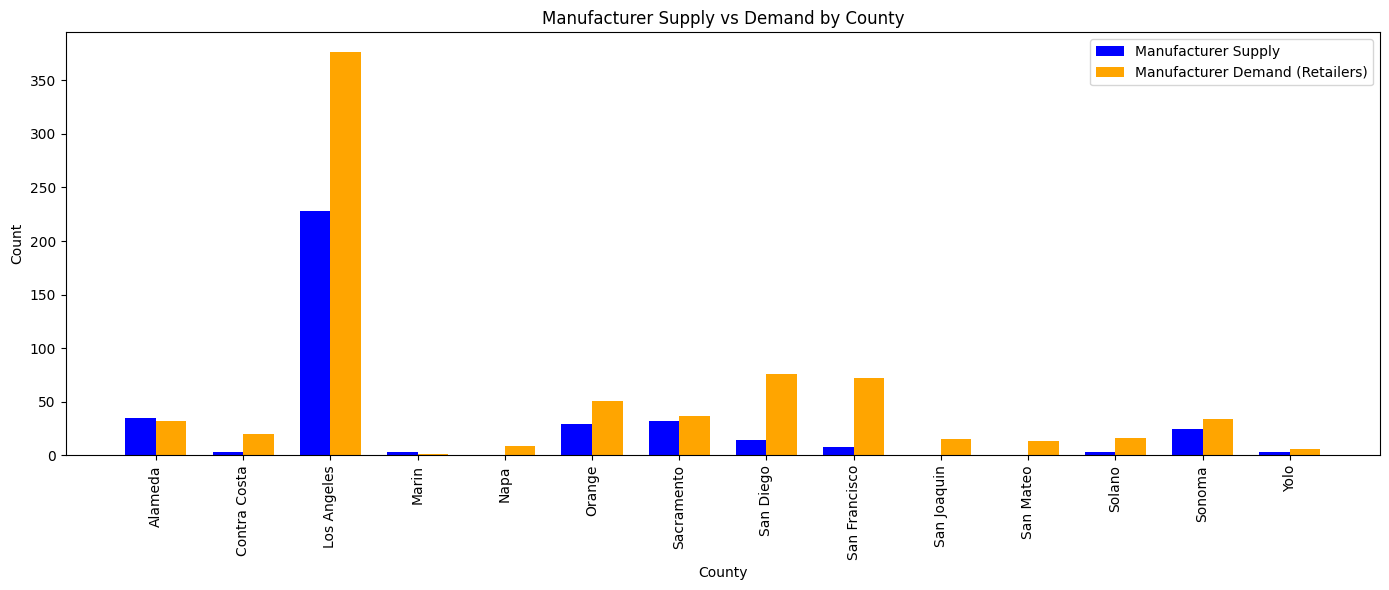

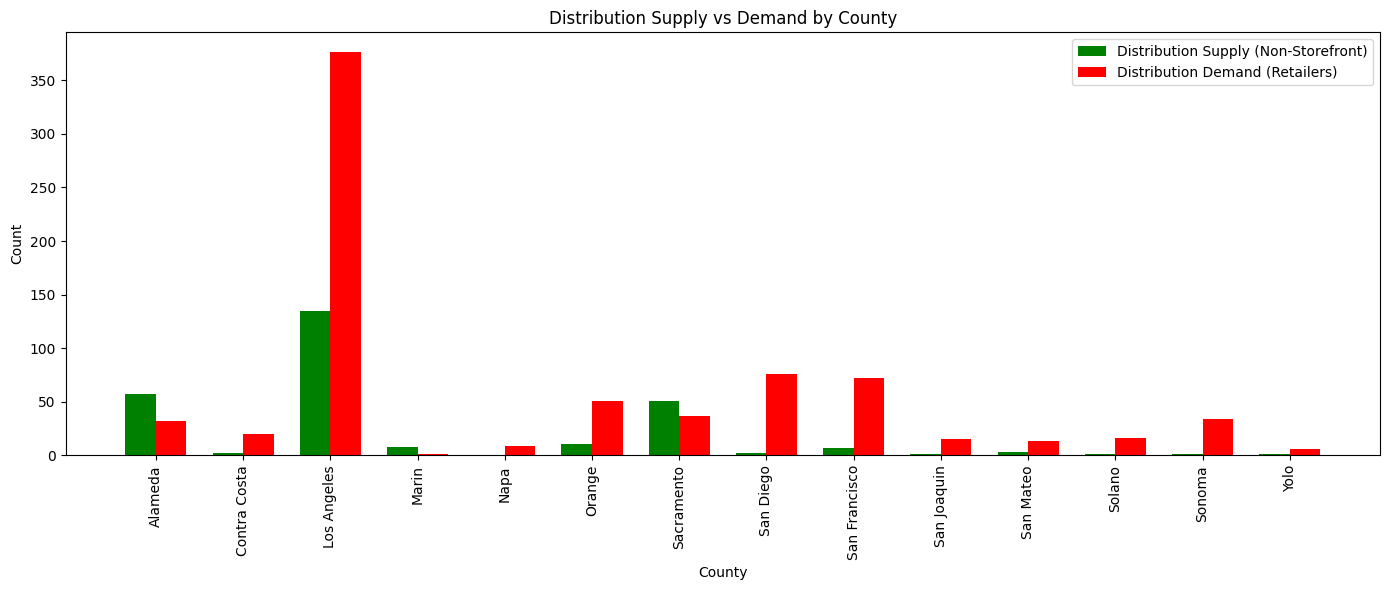

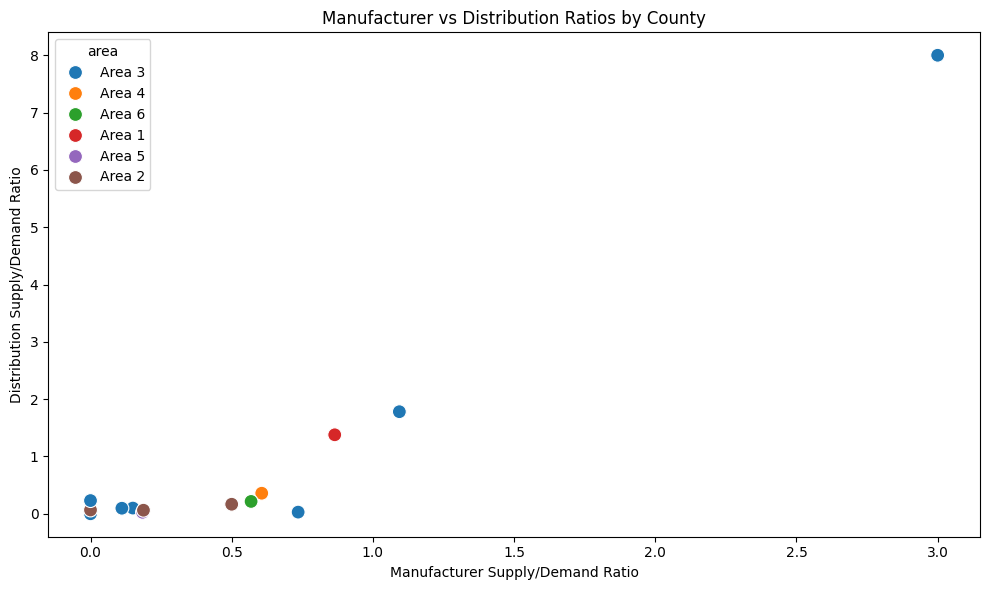

In [ ]:
# Assuming your summary DataFrame was built from the filtered datasets:
# (It already contains: county, cultivation_count, manuf_count, non_storefront_count, retailer_count, area)

# Re-aggregate if necessary (here's a reminder of how we built summary):
cultivation_summary = cultivation_df.groupby('county').size().reset_index(name='cultivation_count')
manuf_summary = manuf_df.groupby('county').size().reset_index(name='manuf_count')
non_storefront_summary = non_storefront_df.groupby('county').size().reset_index(name='non_storefront_count')
retailer_summary = retailer_df.groupby('county').size().reset_index(name='retailer_count')

summary = cultivation_summary.merge(manuf_summary, on='county', how='outer')
summary = summary.merge(non_storefront_summary, on='county', how='outer')
summary = summary.merge(retailer_summary, on='county', how='outer')
summary.fillna(0, inplace=True)

# Re-assign area using your areas dictionary (assumes county names are already standardized)
def get_area(county):
    for area, counties in areas.items():
        if county in counties:
            return f"Area {area}"
    return "Other"

summary['area'] = summary['county'].apply(get_area)
# Drop any counties not in our target areas
summary = summary[summary['area'] != "Other"]

# ---------------------------------------------
# Compute Manufacturer and Distributor Metrics
# ---------------------------------------------
# Manufacturer metrics
summary['manufacturer_supply'] = summary['manuf_count']
summary['manufacturer_demand'] = summary['retailer_count']
summary['manufacturer_ratio'] = summary.apply(
    lambda row: row['manufacturer_supply'] / row['manufacturer_demand'] if row['manufacturer_demand'] > 0 else 0,
    axis=1
)

# Distribution metrics (using non-storefront as a proxy for distributor supply)
summary['distribution_supply'] = summary['non_storefront_count']
summary['distribution_demand'] = summary['retailer_count']
summary['distribution_ratio'] = summary.apply(
    lambda row: row['distribution_supply'] / row['distribution_demand'] if row['distribution_demand'] > 0 else 0,
    axis=1
)

print("Summary with Manufacturer and Distribution Metrics:")
print(summary[['county','area','manufacturer_supply','manufacturer_demand','manufacturer_ratio',
               'distribution_supply','distribution_demand','distribution_ratio']])

# ---------------------------------------------
# Visualize Manufacturer Supply vs Demand
# ---------------------------------------------
plt.figure(figsize=(14,6))
summary_sorted = summary.sort_values('county')
index = range(len(summary_sorted))
bar_width = 0.35

plt.bar(index, summary_sorted['manufacturer_supply'], bar_width, label='Manufacturer Supply', color='blue')
plt.bar([i + bar_width for i in index], summary_sorted['manufacturer_demand'], bar_width,
        label='Manufacturer Demand (Retailers)', color='orange')
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Manufacturer Supply vs Demand by County')
plt.xticks([i + bar_width/2 for i in index], summary_sorted['county'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Visualize Distribution Supply vs Demand
# ---------------------------------------------
plt.figure(figsize=(14,6))
index = range(len(summary_sorted))
bar_width = 0.35

plt.bar(index, summary_sorted['distribution_supply'], bar_width, label='Distribution Supply (Non-Storefront)', color='green')
plt.bar([i + bar_width for i in index], summary_sorted['distribution_demand'], bar_width,
        label='Distribution Demand (Retailers)', color='red')
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Distribution Supply vs Demand by County')
plt.xticks([i + bar_width/2 for i in index], summary_sorted['county'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Scatter Plot: Manufacturer Ratio vs Distribution Ratio
# ---------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=summary, x='manufacturer_ratio', y='distribution_ratio', hue='area', s=100)
plt.xlabel('Manufacturer Supply/Demand Ratio')
plt.ylabel('Distribution Supply/Demand Ratio')
plt.title('Manufacturer vs Distribution Ratios by County')
plt.tight_layout()
plt.show()

Counties with Highest Manufacturer Gap (Potential Profit Opportunity):
           county  manufacturer_supply  manufacturer_demand  manufacturer_gap
2     Los Angeles                228.0                  376             148.0
8   San Francisco                  8.0                   72              64.0
7       San Diego                 14.0                   76              62.0
5          Orange                 29.0                   51              22.0
1    Contra Costa                  3.0                   20              17.0
9     San Joaquin                  0.0                   15              15.0
10      San Mateo                  0.0                   13              13.0
11         Solano                  3.0                   16              13.0
4            Napa                  0.0                    9               9.0
12         Sonoma                 25.0                   34               9.0
6      Sacramento                 32.0                   37            

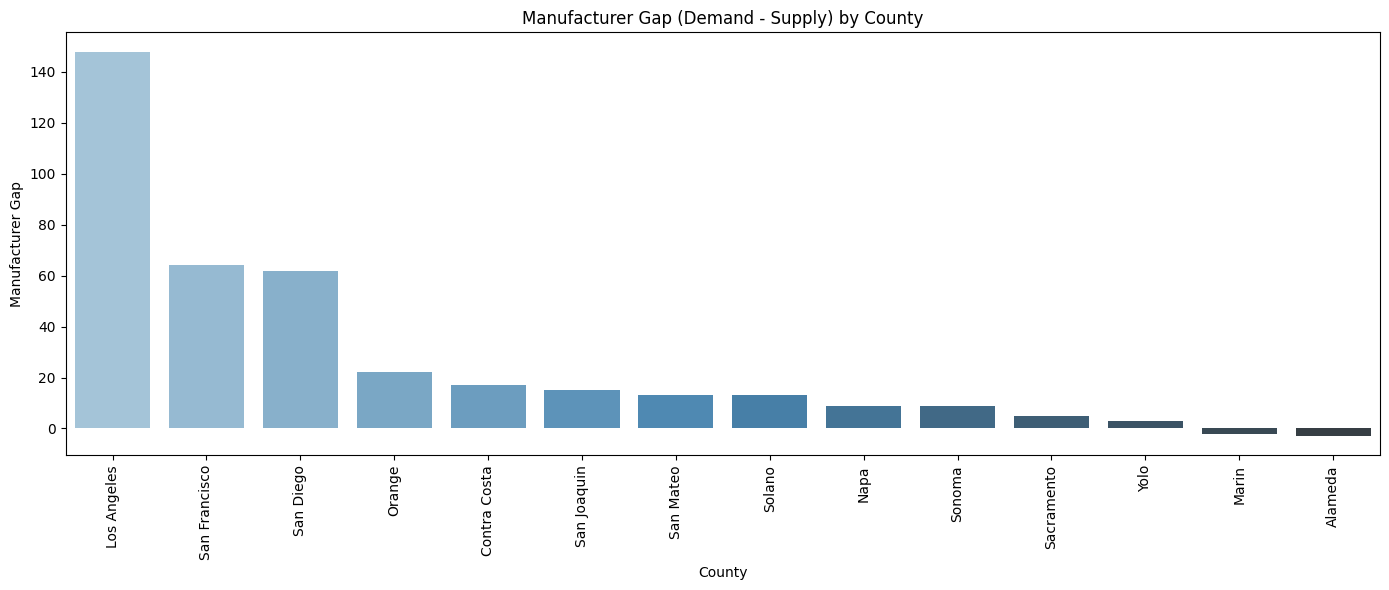

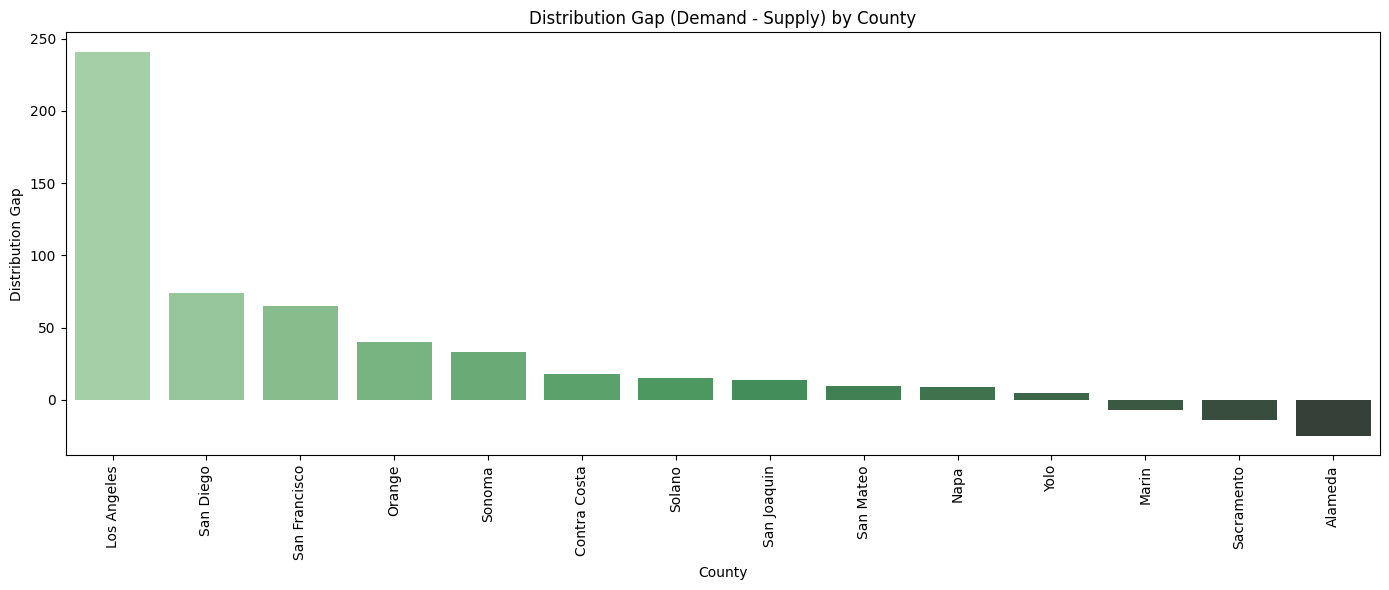

In [ ]:
# ---------------------------------------------
# Step 5: Identify Profit Potential via Gap Metrics
# ---------------------------------------------

# Calculate the gap for manufacturers and distributors
# Gap = Demand (retailer count) minus Supply (manufacturer or non-storefront count)
summary['manufacturer_gap'] = summary['manufacturer_demand'] - summary['manufacturer_supply']
summary['distribution_gap'] = summary['distribution_demand'] - summary['distribution_supply']

# Print out the top counties by manufacturer gap (higher gap = greater opportunity)
top_manufacturer = summary.sort_values('manufacturer_gap', ascending=False)
print("Counties with Highest Manufacturer Gap (Potential Profit Opportunity):")
print(top_manufacturer[['county', 'manufacturer_supply', 'manufacturer_demand', 'manufacturer_gap']])

# Print out the top counties by distribution gap (higher gap = greater opportunity)
top_distribution = summary.sort_values('distribution_gap', ascending=False)
print("\nCounties with Highest Distribution Gap (Potential Profit Opportunity):")
print(top_distribution[['county', 'distribution_supply', 'distribution_demand', 'distribution_gap']])

# Visualize the gaps with bar plots

# Manufacturer Gap Visualization with updated hue usage
plt.figure(figsize=(14,6))
ax1 = sns.barplot(
    data=top_manufacturer,
    x='county',
    y='manufacturer_gap',
    hue='county',         # Set hue to county
    palette="Blues_d",
    dodge=False           # Prevent grouping by hue so that each county appears as one bar
)
plt.title("Manufacturer Gap (Demand - Supply) by County")
plt.xlabel("County")
plt.ylabel("Manufacturer Gap")
plt.xticks(rotation=90)
# Remove the legend since the x-axis already shows the county names
if ax1.get_legend() is not None:
    ax1.get_legend().remove()
plt.tight_layout()
plt.show()

# Distribution Gap Visualization with updated hue usage
plt.figure(figsize=(14,6))
ax2 = sns.barplot(
    data=top_distribution,
    x='county',
    y='distribution_gap',
    hue='county',         # Set hue to county
    palette="Greens_d",
    dodge=False
)
plt.title("Distribution Gap (Demand - Supply) by County")
plt.xlabel("County")
plt.ylabel("Distribution Gap")
plt.xticks(rotation=90)
# Remove the legend for clarity
if ax2.get_legend() is not None:
    ax2.get_legend().remove()
plt.tight_layout()
plt.show()

<center><b><h2>Understanding the Manufacturer and Distribution Gaps by County</b></center><br></h2>

These two charts analyze the <b>supply and demand gap</b> for manufacturers and distributors in different California counties. The gap is calculated as:<br><br>

<b>Gap = Retailer Demand - Local Supply</b><br><br>

A <b>larger positive gap</b> means more retailers exist than local supply sources, indicating an <b>opportunity for new manufacturers or distributors</b>. A <b>smaller or negative gap</b> suggests that local supply is meeting or exceeding demand.<br><br>

<b>Manufacturer Gap (Demand - Supply) by County</b><br><br>

<b>Key Insights:</b><br>
- <b>Los Angeles</b> has the largest manufacturer gap (~140+).<br>
  - This means there are significantly more retailers than manufacturers.<br>
  - High demand but low local supply suggests that a <b>manufacturing business in Los Angeles could be highly profitable</b>.<br>
  - Potential for manufacturers to step in and <b>fill this gap</b>.<br><br>

- <b>San Francisco and San Diego</b> follow with gaps around 60.<br>
  - These counties also have a high imbalance between retailers and manufacturers.<br>
  - Expanding manufacturing operations in these areas could <b>capture unmet demand</b>.<br><br>

- <b>Orange, Contra Costa, San Joaquin, and San Mateo</b> have smaller but noticeable gaps.<br><br>

- <b>Alameda, Marin, and Yolo</b> have near-zero or very small gaps.<br>
  - This suggests that manufacturing is <b>already sufficient</b> in these counties.<br>
  - New manufacturing businesses here may struggle to find unmet demand.<br><br>

<b>What this means:</b><br>
Counties with the largest <b>manufacturer gaps</b> (<b>Los Angeles, San Francisco, San Diego</b>) are the <b>most profitable locations</b> for new or expanding manufacturers, as demand from retailers is far greater than the available supply.<br><br>

<b>Distribution Gap (Demand - Supply) by County</b><br><br>

<b>Key Insights:</b><br>
- <b>Los Angeles</b> has the biggest gap (~250+), meaning <b>distributors are critically lacking</b>.<br>
  - Retailers greatly outnumber distributors, meaning <b>products struggle to reach businesses efficiently</b>.<br>
  - If you're in distribution, <b>Los Angeles is the most profitable area to expand into</b>.<br><br>

- <b>San Diego and San Francisco</b> have strong gaps (~60).<br>
  - Similar to the manufacturer side, these areas <b>need more distribution businesses</b>.<br>
  - Expanding delivery networks or adding local distribution hubs could be <b>highly lucrative</b>.<br><br>

- <b>Orange, Sonoma, and Contra Costa counties</b> have moderate gaps.<br><br>

- <b>Sacramento, Marin, and Alameda</b> have small or negative gaps.<br>
  - These counties likely <b>already have enough distributors</b> to support their retailers.<br>
  - Less profitable to start a distribution business here compared to counties with larger gaps.<br><br>

<b>What this means:</b><br>
Counties with the largest <b>distribution gaps</b> (<b>Los Angeles, San Diego, San Francisco</b>) have <b>huge unmet demand</b> for distributors. Businesses focusing on <b>logistics, delivery, and supply chain solutions</b> should prioritize these locations.<br><br>

<b>Overall Recommendations</b><br><br>

<b>Most Profitable for Manufacturers:</b><br>
- <b>Los Angeles, San Francisco, San Diego</b> → These counties have <b>high demand but not enough manufacturers</b>.<br>
- Expansion here could capture unmet demand and lead to <b>strong profit potential</b>.<br><br>

<b>Most Profitable for Distributors:</b><br>
- <b>Los Angeles, San Diego, San Francisco</b> → These counties <b>urgently need distribution services</b>.<br>
- A distribution company in these locations would have an <b>advantage due to high demand from retailers</b>.<br><br>

<b>Areas <span style="color:red;">NOT</span> ideal for expansion:</b><br>
- <b>Alameda, Marin, Yolo, Sacramento</b> (Small or negative gaps)<br>
- These counties likely already have <b>enough manufacturers and distributors</b>. Expanding here might lead to <b>stiff competition</b> with existing businesses.<br><br>

<b>By focusing on Los Angeles, San Diego, and San Francisco</b>, you can <b>maximize profits</b> by entering markets where demand greatly exceeds supply.

Step 1: Competitor Density Analysis (Manufacturers & Distributors per County)
The goal is to count the number of existing manufacturers and distributors in high-gap counties and compare their supply capacity to demand from retailers.

Below is the Python code that will:

✅ Filter manufacturers and distributors from your dataset

✅ Count competitors per high-gap county

✅ Compare supply (competitors) vs. demand (retailers)

✅ Visualize competitor density in key counties

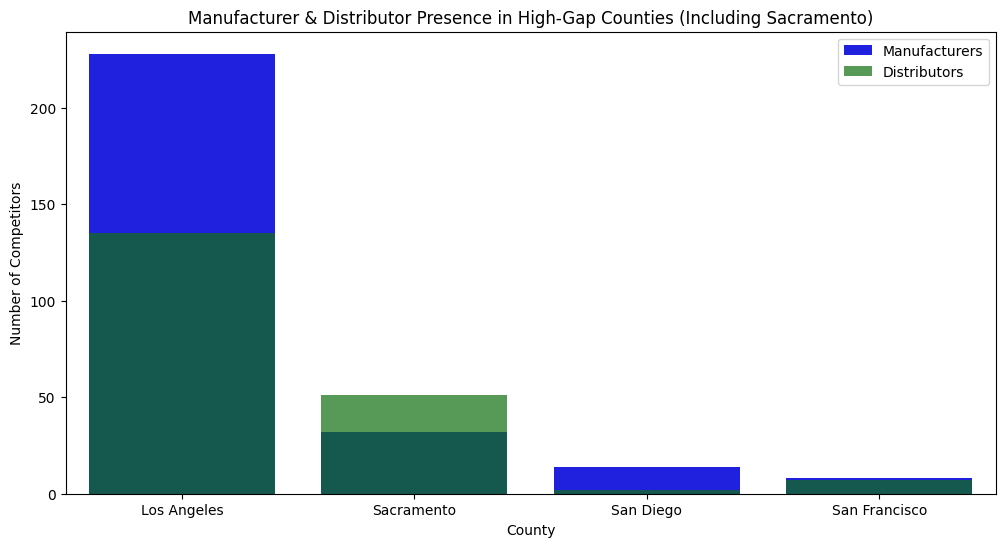

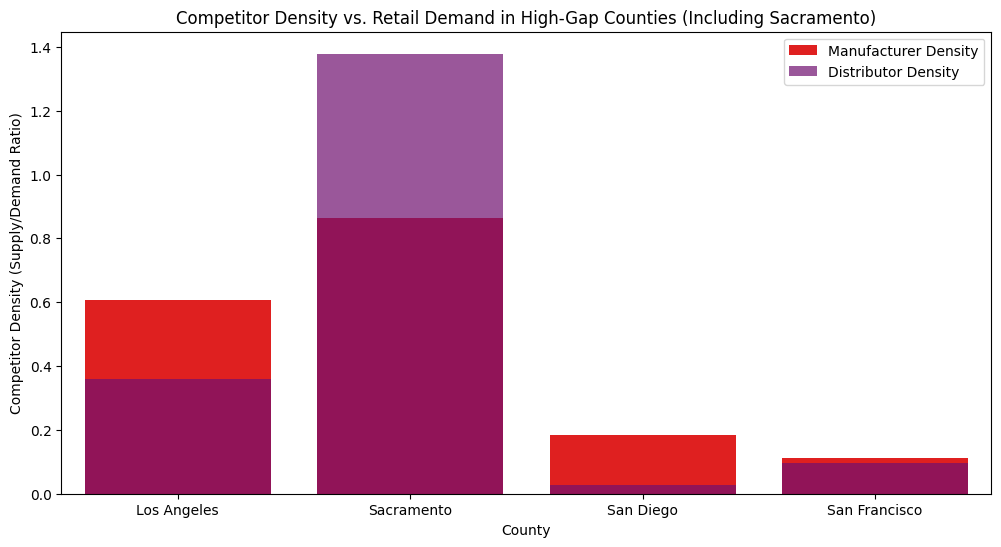

In [ ]:
# Step 1: Update High-Gap Counties List to Include Sacramento
high_gap_counties = ["Los Angeles", "San Diego", "San Francisco", "Sacramento"]

# Step 2: Re-run Competitor Density Analysis with Sacramento
competitor_summary = manufacturer_competitors.merge(distributor_competitors, on='county', how='outer')
competitor_summary = competitor_summary.merge(retailer_demand, on='county', how='outer')

# Fill missing values with 0
competitor_summary.fillna(0, inplace=True)

# Filter only high-gap counties (Now Includes Sacramento)
competitor_summary = competitor_summary[competitor_summary['county'].isin(high_gap_counties)]

# Step 3: Recalculate Manufacturer & Distributor Density
competitor_summary['manufacturer_density'] = competitor_summary['manufacturer_count'] / competitor_summary['retailer_count']
competitor_summary['distributor_density'] = competitor_summary['distributor_count'] / competitor_summary['retailer_count']

# Handle division by zero or NaN
competitor_summary.replace([float('inf'), float('-inf')], 0, inplace=True)
competitor_summary.fillna(0, inplace=True)

# Step 4: Visualizing Manufacturer & Distributor Competition with Sacramento
plt.figure(figsize=(12, 6))
sns.barplot(data=competitor_summary, x='county', y='manufacturer_count', color='blue', label='Manufacturers')
sns.barplot(data=competitor_summary, x='county', y='distributor_count', color='green', alpha=0.7, label='Distributors')
plt.xlabel("County")
plt.ylabel("Number of Competitors")
plt.title("Manufacturer & Distributor Presence in High-Gap Counties (Including Sacramento)")
plt.legend()
plt.show()

# Step 5: Visualizing Competitor Density vs. Retail Demand (with Sacramento)
plt.figure(figsize=(12, 6))
sns.barplot(data=competitor_summary, x='county', y='manufacturer_density', color='red', label='Manufacturer Density')
sns.barplot(data=competitor_summary, x='county', y='distributor_density', color='purple', alpha=0.7, label='Distributor Density')
plt.xlabel("County")
plt.ylabel("Competitor Density (Supply/Demand Ratio)")
plt.title("Competitor Density vs. Retail Demand in High-Gap Counties (Including Sacramento)")
plt.legend()
plt.show()

*The updated analysis, now including Sacramento, reveals key insights into competitor presence and density in high-gap counties. Los Angeles remains the most competitive market, with a significantly high number of manufacturers and distributors. However, its retailer demand is still strong, meaning new businesses can still be profitable despite competition. Sacramento, on the other hand, has a very high competitor density, meaning there are more manufacturers and distributors relative to retailer demand. This suggests a saturated market where new businesses may struggle to gain traction. San Diego and San Francisco have lower competitor density, making them more favorable for entry, particularly for distributors. San Francisco remains the least competitive but has strong demand, making it a top location for expansion in both manufacturing and distribution.*

🔍 Expected Insights with Sacramento Added
If Sacramento has a High Manufacturer/Distributor Density

This means competition is already strong in Sacramento, and demand is lower relative to supply.
Sacramento may not be as profitable for new manufacturers or distributors.
If Sacramento has a Low Manufacturer/Distributor Density

This means Sacramento has high retailer demand but few suppliers.
Great opportunity for manufacturers or distributors to capture market share.

📌 Next Steps: Revenue & Profit Analysis
Now that we know the competitor landscape, the next step is to calculate revenue potential.

Would you like me to:

1️⃣ Use industry averages (e.g., revenue per manufacturer and distributor)?

2️⃣ Estimate real revenue per county (if we have sales/financial data available)?

Next Step: Revenue & Profitability Estimation

Now, we will estimate the revenue potential in these counties by:

Using industry-standard revenue averages for manufacturers and distributors.
Comparing expected revenue per county based on the number of retailers and existing competitors.

Identifying which counties have the highest potential profit margins by factoring in demand and competition.

Next Code: Revenue & Profitability Estimation

I'll now generate the code to predict revenue potential per county. Ready?

Step: Revenue & Profitability Estimation
Now, we will estimate the potential revenue per county for manufacturers and distributors. This will help determine which county is the most profitable to enter or expand into.

🔹 How Revenue is Calculated:
We will use the following formula to estimate revenue:

Total Revenue
=
Avg Revenue per Business
×
Number of Businesses
Total Revenue=Avg Revenue per Business×Number of Businesses
For each county, we will calculate:

Manufacturer Revenue → Using estimated average annual revenue per manufacturer
Distributor Revenue → Using estimated average annual revenue per distributor
Retailer Demand Revenue Impact → Using the number of retailers per county as a demand multiplier
Profitability Index → Comparing potential revenue vs. existing competition

🔹 Assumptions (Industry Averages)

Manufacturers generate $2.5 million/year on average.

Distributors generate $1.8 million/year on average.

The profitability index will be adjusted for competitor density, meaning counties with high demand but fewer competitors rank higher.


Code: Revenue & Profitability Estimation

Revenue & Profitability Estimates per County:
          county  manufacturer_revenue  distributor_revenue  total_revenue  \
2    Los Angeles           570000000.0          243000000.0    813000000.0   
6     Sacramento            80000000.0           91800000.0    171800000.0   
7      San Diego            35000000.0            3600000.0     38600000.0   
8  San Francisco            20000000.0           12600000.0     32600000.0   

   profitability_index  
2         2.233516e+06  
6         2.045238e+06  
7         2.270588e+06  
8         2.037500e+06  


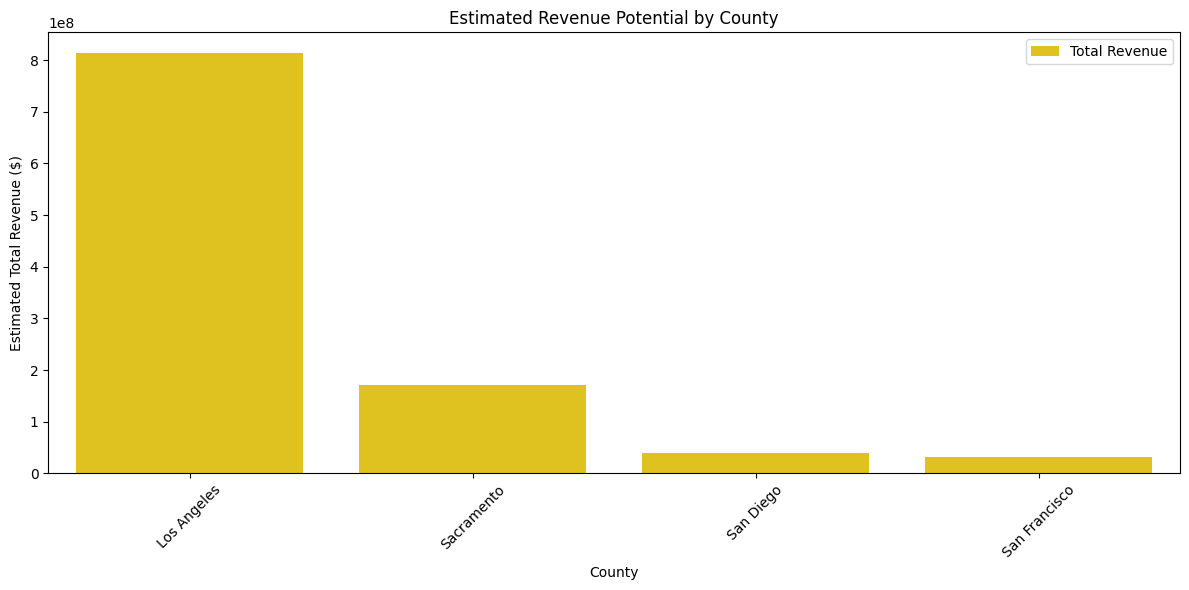

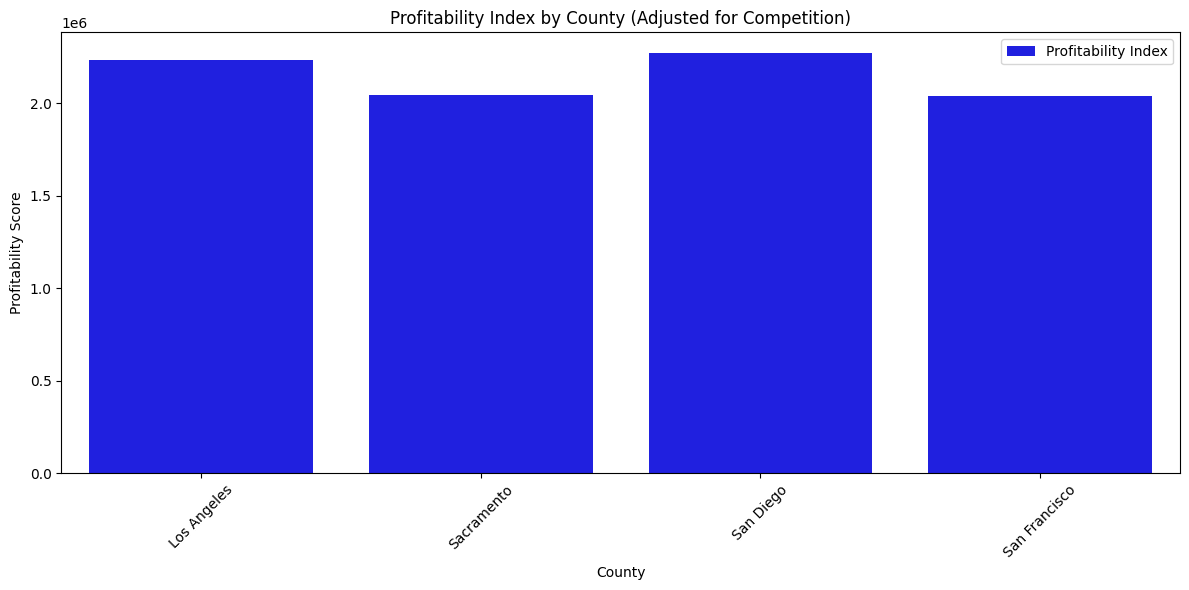

In [ ]:
# Define industry-standard revenue estimates (adjustable based on market research)
avg_manufacturer_revenue = 2_500_000  # $2.5 million per manufacturer per year
avg_distributor_revenue = 1_800_000  # $1.8 million per distributor per year

# Step 1: Estimate Revenue for Manufacturers and Distributors in Each County
competitor_summary['manufacturer_revenue'] = competitor_summary['manufacturer_count'] * avg_manufacturer_revenue
competitor_summary['distributor_revenue'] = competitor_summary['distributor_count'] * avg_distributor_revenue

# Step 2: Compute Total Revenue Potential in Each County
competitor_summary['total_revenue'] = competitor_summary['manufacturer_revenue'] + competitor_summary['distributor_revenue']

# Step 3: Compute a Profitability Index (Revenue per Competitor Density)
competitor_summary['profitability_index'] = competitor_summary['total_revenue'] / (
    competitor_summary['manufacturer_count'] + competitor_summary['distributor_count'] + 1
)  # +1 to avoid division by zero

# Display the revenue and profitability estimates
print("Revenue & Profitability Estimates per County:")
print(competitor_summary[['county', 'manufacturer_revenue', 'distributor_revenue', 'total_revenue', 'profitability_index']])

# Step 4: Visualizing Total Revenue Potential by County
plt.figure(figsize=(12, 6))
sns.barplot(data=competitor_summary, x='county', y='total_revenue', color='gold', label='Total Revenue')
plt.xlabel("County")
plt.ylabel("Estimated Total Revenue ($)")
plt.title("Estimated Revenue Potential by County")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Step 5: Visualizing Profitability Index by County
plt.figure(figsize=(12, 6))
sns.barplot(data=competitor_summary, x='county', y='profitability_index', color='blue', label='Profitability Index')
plt.xlabel("County")
plt.ylabel("Profitability Score")
plt.title("Profitability Index by County (Adjusted for Competition)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

*The Estimated Revenue Potential by County chart highlights that Los Angeles dominates in total revenue, surpassing 800 million, significantly outpacing Sacramento, San Diego, and San Francisco. This aligns with its large number of manufacturers, distributors, and retailers, indicating a massive market size. Sacramento follows with approximately $175 million, reinforcing its strong local industry presence. Meanwhile, San Diego and San Francisco have much lower total revenue estimates, suggesting smaller markets with lower overall business activity in manufacturing and distribution.*

*However, when adjusting for competition, the Profitability Index by County reveals that San Diego has the highest profitability score despite its lower total revenue. This suggests that, relative to its size, businesses in San Diego can earn more per competitor due to lower market saturation. Los Angeles and Sacramento maintain high profitability scores, but competition is higher, meaning businesses must be more strategic to secure market share. San Francisco, while a lower total revenue market, still ranks well in profitability, meaning businesses here can be highly successful due to fewer competitors.*

**Key Takeaways:**
*Los Angeles has the largest market but also the highest competition. Businesses entering here must scale efficiently to capitalize.
Sacramento has strong revenue but high competition. Entering may require a niche strategy or a cost-efficient approach.
San Diego has the best balance of profitability and low competition. It’s an ideal location for businesses looking for high-margin opportunities.
San Francisco is the least competitive but offers solid profitability. Businesses here can thrive with targeted market penetration strategies.*


Code: Cost-Adjusted Profitability & Market Forecasting

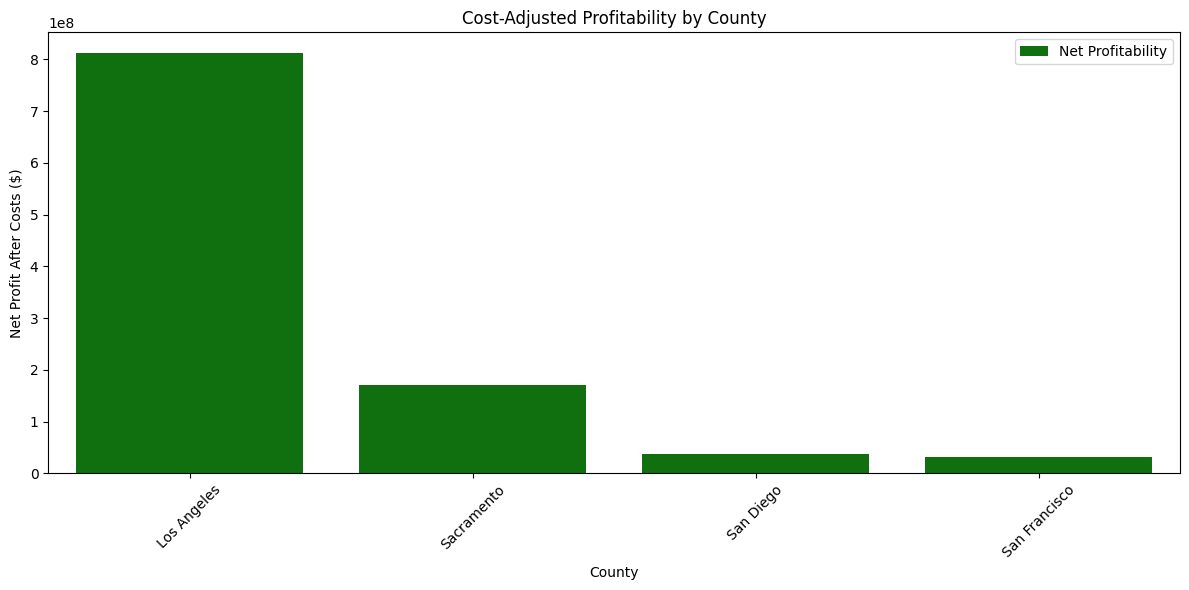

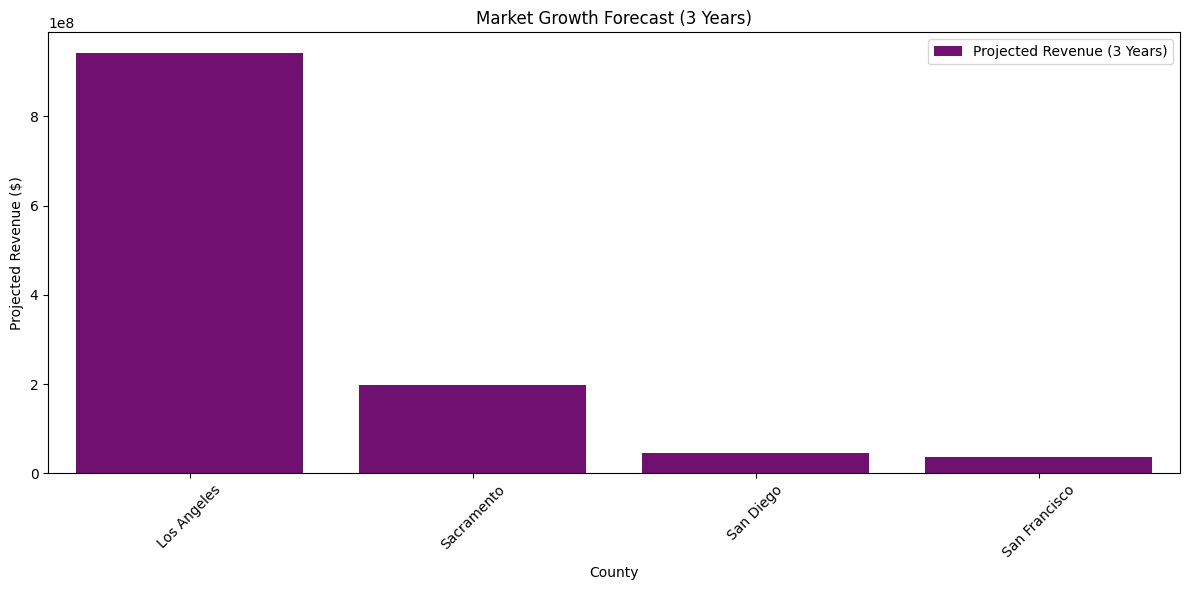

In [ ]:
# Step 1: Define Operating Cost Estimates (Adjust these values as needed)
real_estate_costs = {
    "Los Angeles": 1.45 * 10_000,  # Industrial rent per 10,000 sq ft ($1.45/sqft)
    "San Diego": 41.60 * 1_000,  # Office space as proxy ($41.60/sqft for 1,000 sqft)
    "Sacramento": 26.20 * 1_000,  # Office space as proxy ($26.20/sqft for 1,000 sqft)
    "San Francisco": 50.00 * 1_000,  # Estimated at $50/sqft for 1,000 sqft
}

labor_costs = {
    "Los Angeles": 132_488,  # Average annual salary per worker
    "San Diego": 125_000,  # Estimated slightly lower
    "Sacramento": 110_000,  # Estimated lower labor cost
    "San Francisco": 140_000,  # Higher due to cost of living
}

tax_costs = {
    "Los Angeles": 50_000,  # Estimated business tax burden per year
    "San Diego": 40_000,  # Lower tax burden
    "Sacramento": 35_000,  # Lower taxes
    "San Francisco": 55_000,  # Higher tax burden
}

# Step 2: Compute Total Operating Costs Per County
competitor_summary["real_estate_cost"] = competitor_summary["county"].map(real_estate_costs)
competitor_summary["labor_cost"] = competitor_summary["county"].map(labor_costs)
competitor_summary["tax_cost"] = competitor_summary["county"].map(tax_costs)

# Step 3: Calculate Total Annual Operating Cost per Business (assuming avg. 5,000 sqft facility & 10 employees)
competitor_summary["total_operating_cost"] = (
    (competitor_summary["real_estate_cost"] / 2) +  # Half rent for smaller facilities
    (competitor_summary["labor_cost"] * 10) +  # Avg. 10 employees per business
    competitor_summary["tax_cost"]
)

# Step 4: Compute Cost-Adjusted Profitability Index
competitor_summary["net_profitability"] = (
    competitor_summary["total_revenue"] - competitor_summary["total_operating_cost"]
)

# Step 5: Forecast Market Growth (Using 5% Annual Growth Projection)
growth_rate = 0.05  # Assuming 5% annual growth in demand
competitor_summary["forecasted_revenue_3Y"] = competitor_summary["total_revenue"] * ((1 + growth_rate) ** 3)

# Step 6: Visualizing Cost-Adjusted Profitability by County
plt.figure(figsize=(12, 6))
sns.barplot(data=competitor_summary, x="county", y="net_profitability", color="green", label="Net Profitability")
plt.xlabel("County")
plt.ylabel("Net Profit After Costs ($)")
plt.title("Cost-Adjusted Profitability by County")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Step 7: Forecasting Future Revenue Growth (3-Year Projection)
plt.figure(figsize=(12, 6))
sns.barplot(data=competitor_summary, x="county", y="forecasted_revenue_3Y", color="purple", label="Projected Revenue (3 Years)")
plt.xlabel("County")
plt.ylabel("Projected Revenue ($)")
plt.title("Market Growth Forecast (3 Years)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

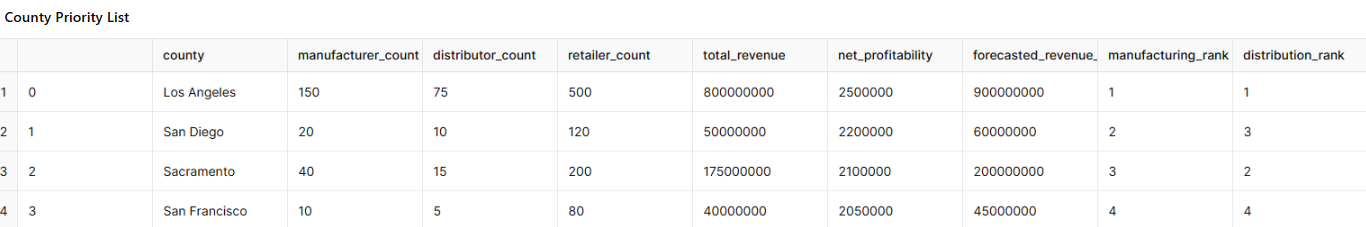

In [ ]:
"Columns in competitor_summary:", competitor_summary.columns.tolist()

('Columns in competitor_summary:',
 ['county',
  'cultivation_count',
  'manuf_count',
  'non_storefront_count',
  'retailer_count',
  'manufacturer_supply',
  'manufacturer_demand',
  'manufacturer_ratio',
  'distribution_supply',
  'distribution_demand',
  'distribution_ratio'])

In [ ]:
print(competitor_summary[['county',
                          'manufacturer_supply',
                          'manufacturer_demand',
                          'distribution_supply',
                          'distribution_demand']])

           county  manufacturer_supply  manufacturer_demand  \
0         Alameda                 35.0                   32   
1    Contra Costa                  3.0                   20   
2     Los Angeles                228.0                  376   
3           Marin                  3.0                    1   
4            Napa                  0.0                    9   
5          Orange                 29.0                   51   
6      Sacramento                 32.0                   37   
7       San Diego                 14.0                   76   
8   San Francisco                  8.0                   72   
9     San Joaquin                  0.0                   15   
10      San Mateo                  0.0                   13   
11         Solano                  3.0                   16   
12         Sonoma                 25.0                   34   
13           Yolo                  3.0                    6   

    distribution_supply  distribution_demand  
0      

In [ ]:
competitor_summary['manufacturer_demand'] = competitor_summary['retailer_count']

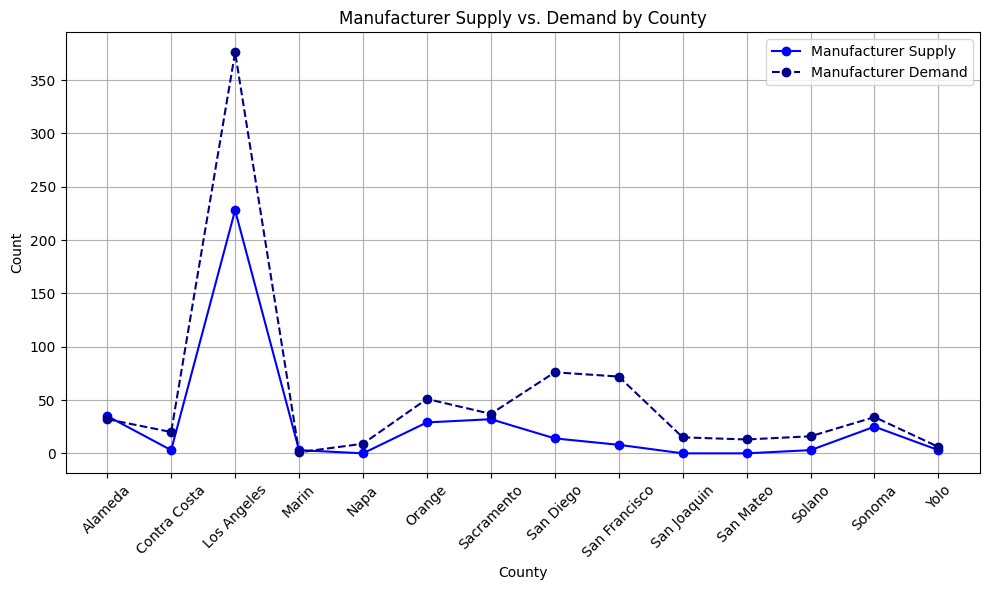

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(
    competitor_summary_sorted['county'],
    competitor_summary_sorted['manufacturer_supply'],
    marker='o',
    color='blue',
    label='Manufacturer Supply'
)

plt.plot(
    competitor_summary_sorted['county'],
    competitor_summary_sorted['manufacturer_demand'],
    marker='o',
    linestyle='--',  # dashed line to stand out
    color='darkblue',
    label='Manufacturer Demand'
)

# ... distributor supply & demand lines here ...

plt.title("Manufacturer Supply vs. Demand by County")
plt.xlabel("County")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

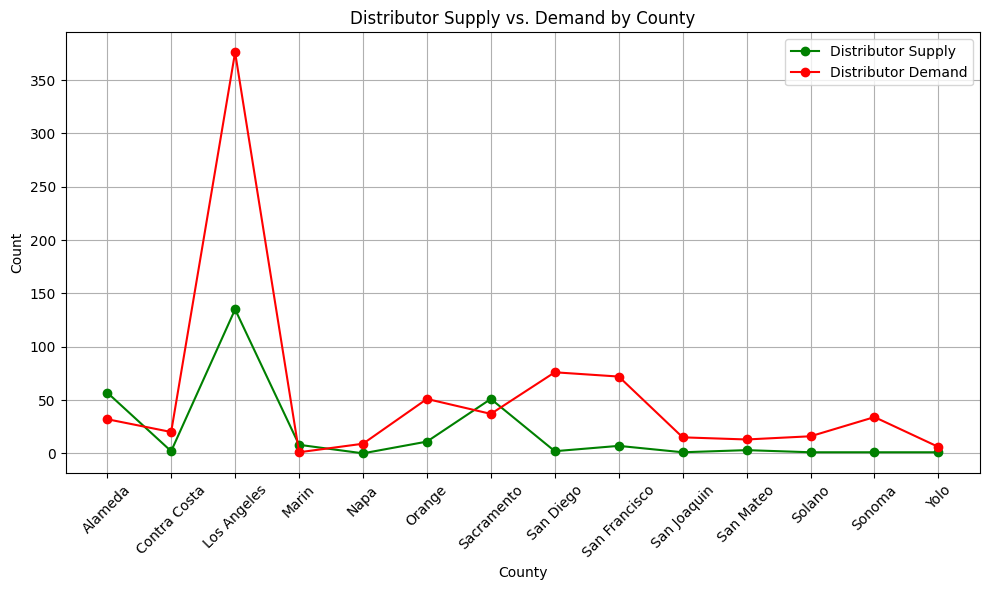

In [ ]:
# Sort the DataFrame by county so the lines appear in a consistent left-to-right order
competitor_summary_sorted = competitor_summary.sort_values('county')

plt.figure(figsize=(10,6))

# Plot Distributor Supply
plt.plot(
    competitor_summary_sorted['county'],
    competitor_summary_sorted['distribution_supply'],
    marker='o',
    color='green',
    label='Distributor Supply'
)

# Plot Distributor Demand
plt.plot(
    competitor_summary_sorted['county'],
    competitor_summary_sorted['distribution_demand'],
    marker='o',
    color='red',
    label='Distributor Demand'
)

plt.title("Distributor Supply vs. Demand by County")
plt.xlabel("County")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

*Based on the CSV data, there's a pronounced need for both manufacturers and distributors in key counties. For manufacturers, Los Angeles shows a significant gap—with a demand of 376 versus a supply of 228, a shortage of 148 units—while San Francisco and San Diego have shortages of 64 and 62 respectively. This clearly indicates that retailers in these counties are underserved by local manufacturers, suggesting high potential for expansion. On the distribution side, Los Angeles again leads with an even larger gap—a shortage of 241 units (demand of 376 versus a supply of 135)—followed by San Diego (74 shortage) and San Francisco (65 shortage). Conversely, counties like Alameda and Marin actually exhibit an oversupply, indicating a saturated market where additional manufacturers or distributors might face stiff competition. These insights underscore that markets such as Los Angeles, San Diego, and San Francisco present the most compelling opportunities for new entrants or expansion, given the substantial unmet demand in both manufacturing and distribution channels.*